In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.layers import Input, Dense
from keras import Model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import io
from google.colab import files
import seaborn as sn
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [145]:
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [146]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [148]:
df.shape

(284806, 31)

In [149]:
df['Class'].value_counts()

0    284314
1       492
Name: Class, dtype: int64

In [150]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<Axes: xlabel='Class', ylabel='count'>

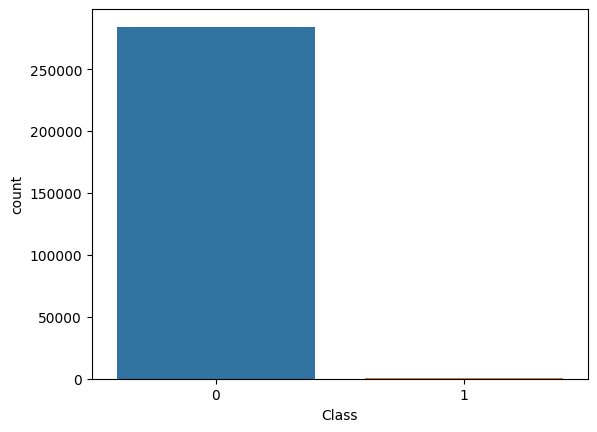

In [151]:
sn.countplot(data=df, x='Class')

In [152]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [153]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [154]:
# Discard columns 'Time', 'Amount'
df = df.drop(['Time', 'Amount'], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,0
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0


In [155]:
X = df.drop('Class', axis=1)
y = df['Class']

In [156]:
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
200046,1.977177,0.051774,-0.684187,1.242591,0.076067,-0.202409,-0.089650,-0.037484,0.646040,0.124264,...,-0.237198,-0.460380,-1.228659,0.508632,0.571726,-0.385530,-1.188340,0.036092,-0.023380,0
150663,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,...,0.055684,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,1
132813,-1.354231,1.572951,0.414198,-0.055156,-0.532206,-0.346550,-0.285364,1.155805,-0.585096,-0.484747,...,-0.094035,-0.148658,-0.627336,0.128588,-0.076580,-0.214804,0.098563,0.114048,0.004855,0
42784,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,-13.608143,...,-0.088342,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,1
59539,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,-2.495619,...,0.025427,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,1


In [158]:
new_df.shape

(984, 29)

In [159]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 200046 to 204503
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      984 non-null    float64
 1   V2      984 non-null    float64
 2   V3      984 non-null    float64
 3   V4      984 non-null    float64
 4   V5      984 non-null    float64
 5   V6      984 non-null    float64
 6   V7      984 non-null    float64
 7   V8      984 non-null    float64
 8   V9      984 non-null    float64
 9   V10     984 non-null    float64
 10  V11     984 non-null    float64
 11  V12     984 non-null    float64
 12  V13     984 non-null    float64
 13  V14     984 non-null    float64
 14  V15     984 non-null    float64
 15  V16     984 non-null    float64
 16  V17     984 non-null    float64
 17  V18     984 non-null    float64
 18  V19     984 non-null    float64
 19  V20     984 non-null    float64
 20  V21     984 non-null    float64
 21  V22     984 non-null    float64

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


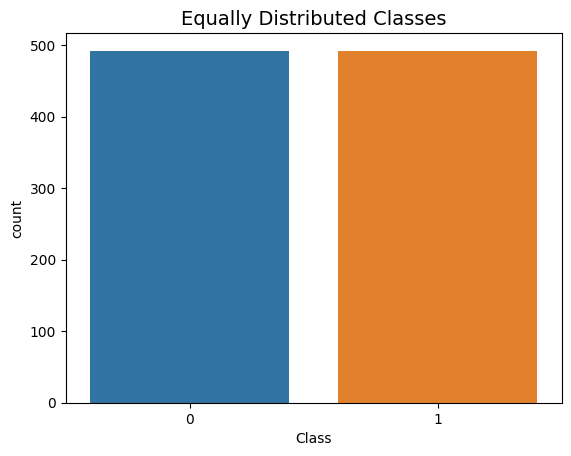

In [160]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sn.countplot(data=new_df, x='Class')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

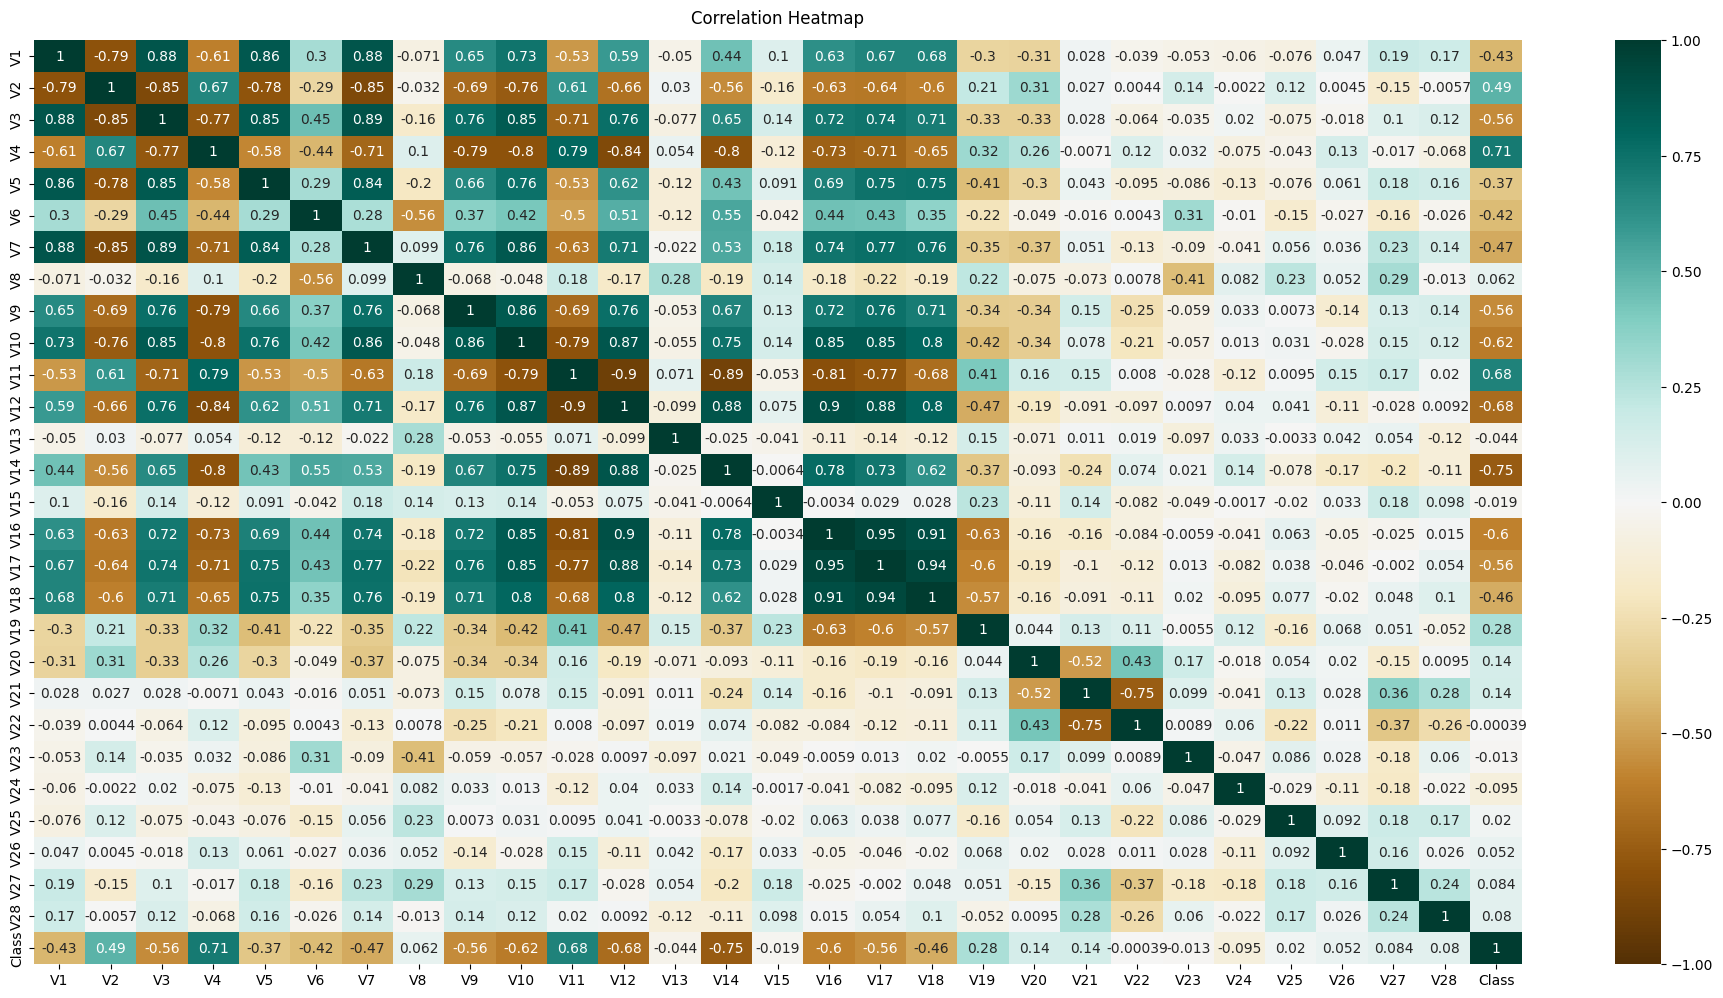

In [161]:
plt.figure(figsize=(24, 12))
heatmap = sn.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [162]:
target_variable = 'Class'
correlation_matrix = new_df.corr()
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)
print("Correlation of {} with other features:".format(target_variable))
print(correlation_with_target)

Correlation of Class with other features:
V1    -0.432787
V2     0.492539
V3    -0.564696
V4     0.711883
V5    -0.374827
V6    -0.416815
V7    -0.472629
V8     0.062009
V9    -0.562983
V10   -0.621920
V11    0.679874
V12   -0.683807
V13   -0.043680
V14   -0.750906
V15   -0.018873
V16   -0.596094
V17   -0.558813
V18   -0.462434
V19    0.275555
V20    0.139572
V21    0.140646
V22   -0.000395
V23   -0.013189
V24   -0.094742
V25    0.019877
V26    0.052288
V27    0.083949
V28    0.079512
Name: Class, dtype: float64


Text(0.5, 1.0, "'V17 vs Class (Negative Correlation)'")

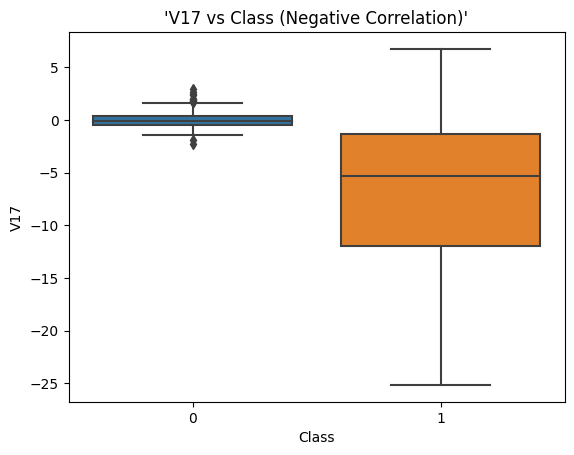

In [163]:
sn.boxplot(x="Class", y="V17", data=new_df)
plt.title("'V17 vs Class (Negative Correlation)'")

Text(0.5, 1.0, "'V14 vs Class (Negative Correlation)'")

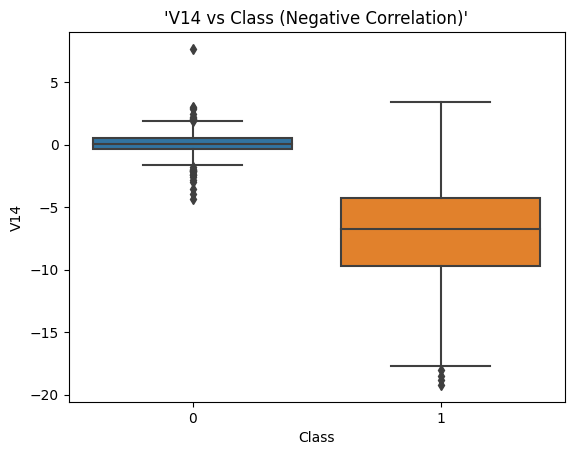

In [164]:
sn.boxplot(x="Class", y="V14", data=new_df)
plt.title("'V14 vs Class (Negative Correlation)'")

Text(0.5, 1.0, "'V12 vs Class (Negative Correlation)'")

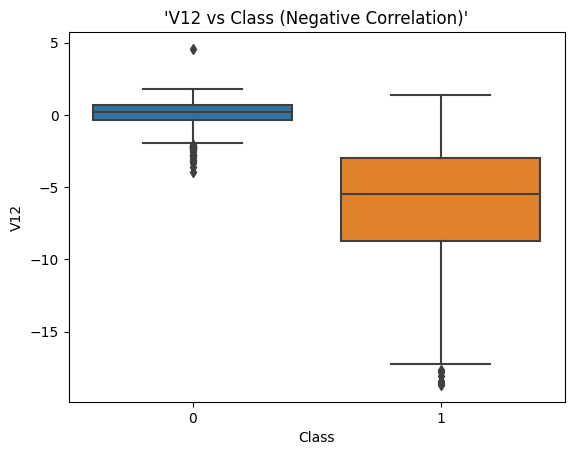

In [165]:
sn.boxplot(x="Class", y="V12", data=new_df)
plt.title("'V12 vs Class (Negative Correlation)'")

Text(0.5, 1.0, "'V10 vs Class (Negative Correlation)'")

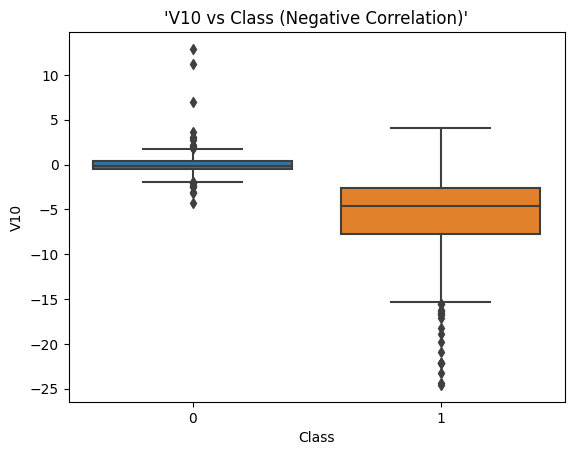

In [166]:
sn.boxplot(x="Class", y="V10", data=new_df)
plt.title("'V10 vs Class (Negative Correlation)'")

Text(0.5, 1.0, "'V11 vs Class (Positive Correlation)'")

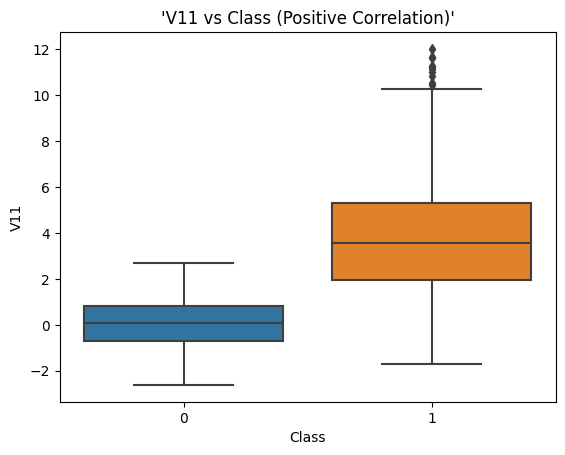

In [167]:
sn.boxplot(x="Class", y="V11", data=new_df)
plt.title("'V11 vs Class (Positive Correlation)'")

Text(0.5, 1.0, "'V4 vs Class (Positive Correlation)'")

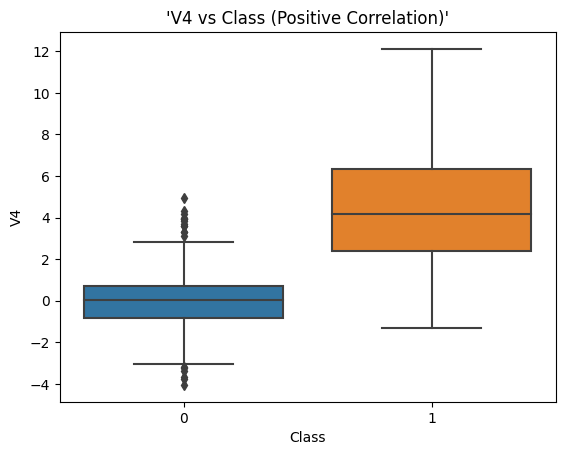

In [168]:
sn.boxplot(x="Class", y="V4", data=new_df)
plt.title("'V4 vs Class (Positive Correlation)'")

Text(0.5, 1.0, "'V2 vs Class (Positive Correlation)'")

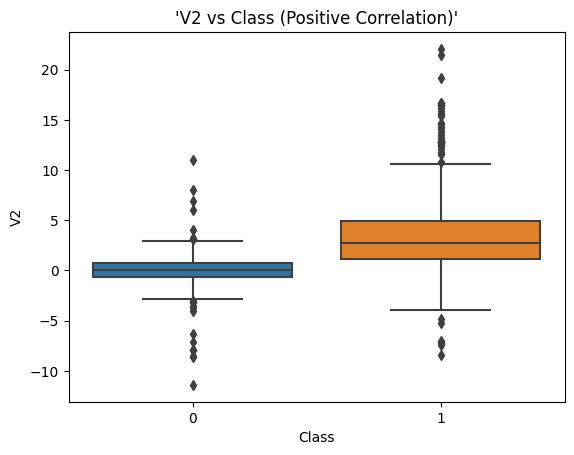

In [169]:
sn.boxplot(x="Class", y="V2", data=new_df)
plt.title("'V2 vs Class (Positive Correlation)'")

Text(0.5, 1.0, "'V19 vs Class (Positive Correlation)'")

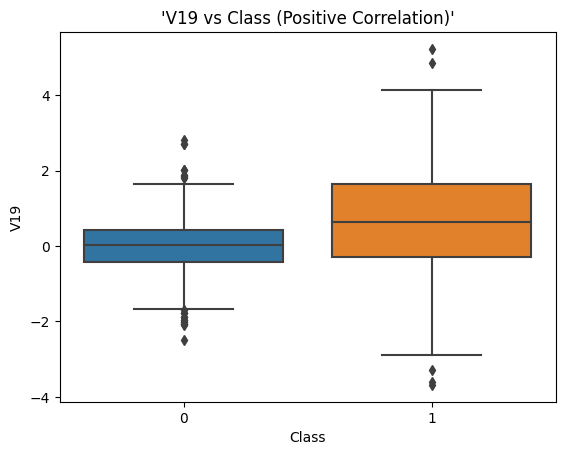

In [170]:
sn.boxplot(x="Class", y="V19", data=new_df)
plt.title("'V19 vs Class (Positive Correlation)'")

In [171]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [172]:
X.shape

(984, 28)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
X_train.shape

(787, 28)

In [175]:
X_test.shape

(197, 28)

In [176]:
# Build AutoEncoder model
input_layer = Input(shape=(28,))
encoded = Dense(24, activation='relu')(input_layer)
encoded = Dense(20, activation='relu')(encoded)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(24, activation='relu')(decoded)
decoded = Dense(28, activation='sigmoid')(decoded)

encoded_input = Input(shape=(10,))
decoder_layer = decoded
autoencoder = Model(input_layer, decoder_layer)
autoencoder.compile(optimizer='adam', loss='mse')

In [177]:
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28)]              0         
                                                                 
 dense_48 (Dense)            (None, 24)                696       
                                                                 
 dense_49 (Dense)            (None, 20)                500       
                                                                 
 dense_50 (Dense)            (None, 15)                315       
                                                                 
 dense_51 (Dense)            (None, 10)                160       
                                                                 
 dense_52 (Dense)            (None, 15)                165       
                                                                 
 dense_53 (Dense)            (None, 20)                320

In [178]:
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
25/25 [==============================] - 3s 20ms/step - loss: 15.4389 - val_loss: 14.8990
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 14.7648 - val_loss: 14.2137
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 14.4174 - val_loss: 14.1283
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 14.3741 - val_loss: 14.1029
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 14.3489 - val_loss: 14.0835
Epoch 6/10
25/25 [==============================] - 0s 10ms/step - loss: 14.3303 - val_loss: 14.0726
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 14.3186 - val_loss: 14.0653
Epoch 8/10
25/25 [==============================] - 0s 8ms/step - loss: 14.3096 - val_loss: 14.0443
Epoch 9/10
25/25 [==============================] - 0s 8ms/step - loss: 14.2949 - val_loss: 14.0332
Epoch 10/10
25/25 [==============================] - 0s 8ms/step - loss: 14.2844 - val_loss: 14.0

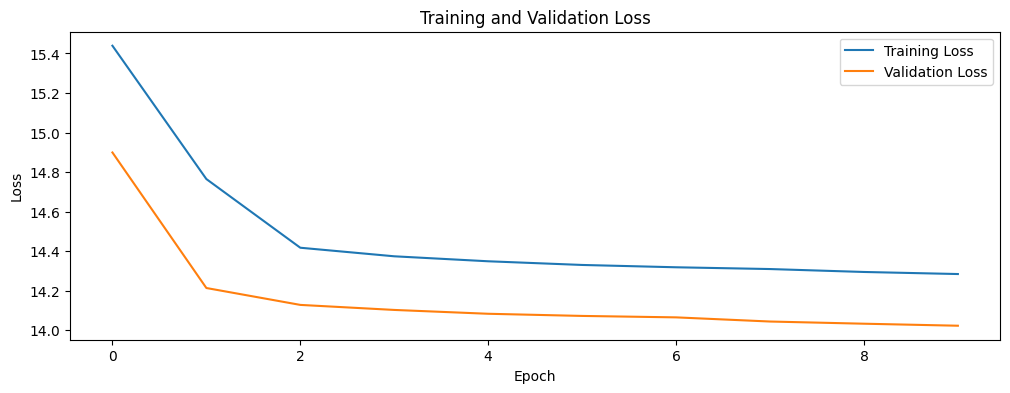

In [179]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [180]:
# Extract features from the bottleneck layer
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [181]:
X_encoded.shape

(197, 10)

In [182]:
# Apply K-means clustering and generate reference labels
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_encoded)

In [183]:
# Apply t-SNE on the 10-dimensional feature embedding
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_encoded)

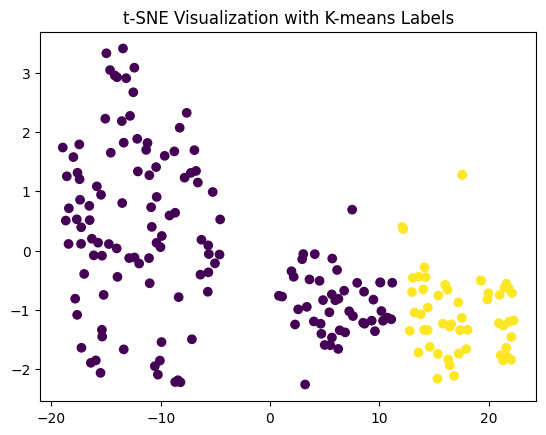

In [184]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('t-SNE Visualization with K-means Labels')
plt.show()

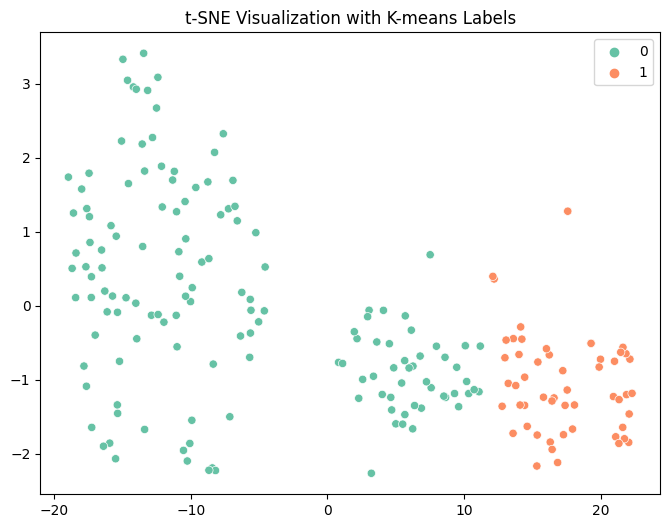

In [185]:
plt.figure(figsize=(8, 6))
sn.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='Set2', legend='full')
plt.title('t-SNE Visualization with K-means Labels')
plt.show()

In [186]:
true_labels = y_test

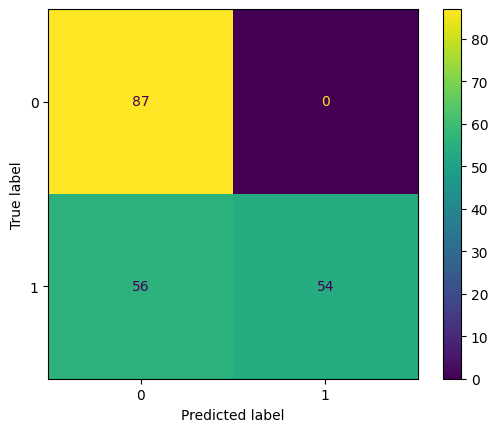

In [187]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, kmeans_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [197]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_curve, silhouette_score, precision_score, recall_score

# Evaluate K-means clustering
accuracy = accuracy_score(true_labels, kmeans_labels)
f1 = f1_score(true_labels, kmeans_labels)
roc_auc = roc_auc_score(true_labels, kmeans_labels)
precision, recall, _ = precision_recall_curve(true_labels, kmeans_labels)
silhouette = silhouette_score(X_encoded, kmeans_labels)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print(f'Silhouette Score: {silhouette:.4f}')

Accuracy: 0.7157
F1 Score: 0.6585
ROC AUC Score: 0.7455
Silhouette Score: 0.6698


In [198]:
print("\nClassification Report for Test Set:")
print(classification_report(true_labels, kmeans_labels))



Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        87
           1       1.00      0.49      0.66       110

    accuracy                           0.72       197
   macro avg       0.80      0.75      0.71       197
weighted avg       0.83      0.72      0.70       197



In [199]:
from sklearn.metrics import roc_curve, auc

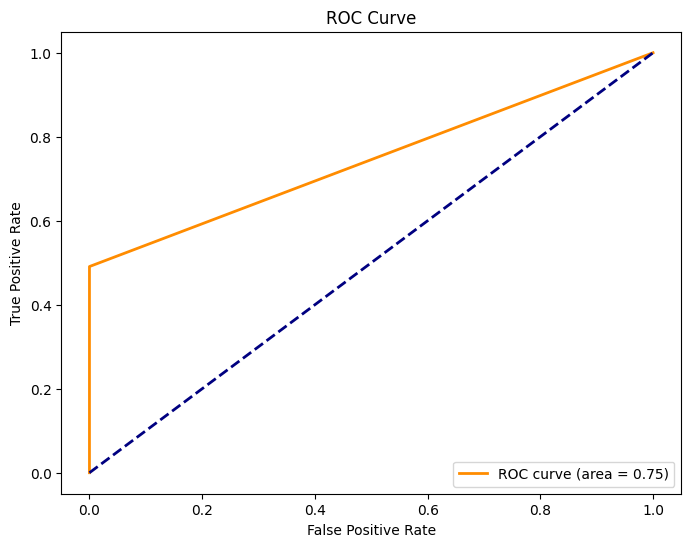

In [200]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, kmeans_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

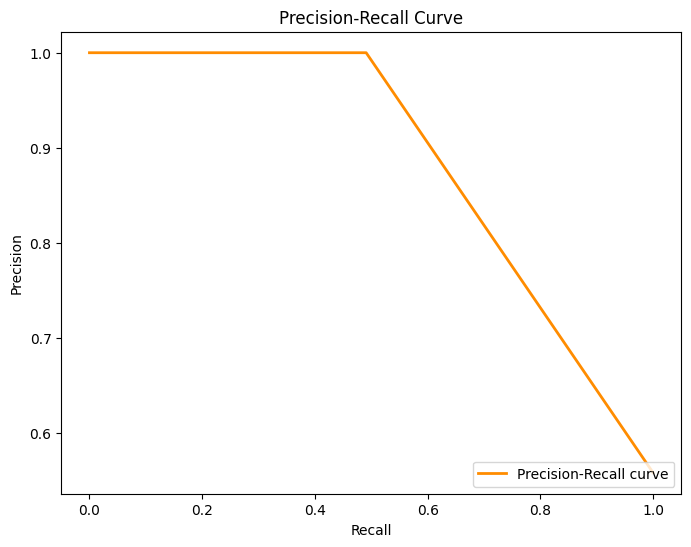

In [201]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(true_labels, kmeans_labels)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()